In [129]:
import numpy as np
import pandas as pd
import requests
import concurrent.futures
import matplotlib.pyplot as plt
import os

In [3]:
finalResult=pd.read_csv('combine_final.csv')
media=finalResult['Media']

In [4]:
#add opt: https://image.pixstory.com/optimized/Pixstory-image-164416629024955.jpeg
opt_media=[m[:27]+'optimized/'+m[27:] for m in list(media)]
opt_media

['https://image.pixstory.com/optimized/Pixstory-image-166611202045590.png',
 'https://image.pixstory.com/optimized/Pixstory-image-166611193223081.png',
 'https://image.pixstory.com/optimized/Pixstory-image-166611187780693.png',
 'https://image.pixstory.com/optimized/Pixstory-image-166611176567263.png',
 'https://image.pixstory.com/optimized/Pixstory-image-166611105636662.png',
 'https://image.pixstory.com/optimized/Pixstory-image-166611139634417.png',
 'https://image.pixstory.com/optimized/Pixstory-image-166611137131655.png',
 'https://image.pixstory.com/optimized/Pixstory-image-166611082689680.jpeg',
 'https://image.pixstory.com/optimized/Pixstory-image-166611083682059.png',
 'https://image.pixstory.com/optimized/Pixstory-image-16661110888754.png',
 'https://image.pixstory.com/optimized/Pixstory-image-166611099267384.png',
 'https://image.pixstory.com/optimized/Pixstory-image-166611100491914.jpeg',
 'https://image.pixstory.com/optimized/Pixstory-image-166611099052824.png',
 'https://i

Download images

In [42]:
folder_path = "Piximages"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

def download_image(url):
    response = requests.get(url)

    if response.status_code == 200:
        file_name = url.split("/")[-1]
        file_path = os.path.join(folder_path, file_name)

        
        with open(file_path, "wb") as f:
            f.write(response.content)

    else:
        print("Failed to download image. Wrong url.")

with concurrent.futures.ThreadPoolExecutor(max_workers=15) as executor:
    executor.map(download_image, opt_media)

Failed to download image. Wrong url.Failed to download image. Wrong url.

Failed to download image. Wrong url.Failed to download image. Wrong url.

Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.Failed to download image. Wrong url.

Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
Failed to download image. Wrong url.
F

Image captions

In [5]:
#docker build -f Im2txtRestDockerfile -t uscdatascience/im2txt-rest-tika
#docker run -p 8764:8764 -it uscdatascience/inception-rest-tika

url = "http://localhost:8764/inception/v3/caption/image?url=https://image.pixstory.com/optimized/Pixstory-image-166611202045590.png"
response = requests.get(url)
if response.ok:
    json = response.json()
    caption=json['captions'][0]['sentence']
    print(caption)
else:
    print("Request failed with status code:", response.status_code)

a sign that is on the side of a building .


In [6]:
#docker build -f Im2txtRestDockerfile -t uscdatascience/im2txt-rest-tika
#docker run -p 8764:8764 -it uscdatascience/inception-rest-tika
captions = []

def get_caption(media):
    url = "http://localhost:8764/inception/v3/caption/image?url=" + media
    response = requests.get(url)
    if response.ok:
        json = response.json()
        caption = json['captions'][0]['sentence']
        return caption
    else:
        return ''

with concurrent.futures.ThreadPoolExecutor(max_workers=15) as executor:
    results = executor.map(get_caption, opt_media)
    for result in results:
        captions.append(result)

In [7]:
len(captions)

95000

In [8]:
finalResult['Image Caption']=captions

In [9]:
finalResult.to_csv('combine_captions.csv')

Detect objects

In [10]:
#docker build -f InceptionRestDockerfile -t uscdatascience/inception-rest-tika 
#docker run -p 8764:8764 -it uscdatascience/inception-rest-tika
url_o = "http://localhost:8764/inception/v4/classify/image?topn=2&min_confidence=0.03&url=https://image.pixstory.com/optimized/Pixstory-image-166611202045590.png"
response_o = requests.get(url_o)
if response_o.ok:
    json_o = response_o.json()
    objects=json_o['classnames']
    print(objects)
else:
    print("Request failed with status code:", response_o.status_code)

['street sign', 'scoreboard']


In [11]:
objects= []

def get_object(media):
    url = "http://localhost:8764/inception/v4/classify/image?topn=2&min_confidence=0.03&url=" + media
    response = requests.get(url)
    if response.ok:
        json = response.json()
        iobject = json['classnames']
        return iobject
    else:
        return ''

with concurrent.futures.ThreadPoolExecutor(max_workers=15) as executor:
    result_o = executor.map(get_object, opt_media)
    for result in result_o:
        objects.append(result)

In [12]:
len(objects)

95000

In [13]:
finalResult['Detected Objects']=objects

In [131]:
#finalResult.to_csv('combine_image.csv')
finalResult

,Unnamed: 0,Unnamed: 0.1,Story Primary ID,Story ID,User Primary ID,User ID,Gender,Age,Title,Narrative,...,Asia Holiday,Africa Holiday,Oceania Holiday,Public Holiday Or Not,Covid Cases,Covid Deaths,Covid Tests,Covid Vaccinations,Image Caption,Detected Objects
0,0,0,156581,STY1666112066,86625,USR1662300553,NaN,12,Qatar Airways cuts flights to accommodate FIFA...,"<p dir=""ltr"">Qatar Airways&#160;has withdrawn ...",...,NaN,NaN,NaN,True,1498635.0,4490.0,0.0,16637213.0,a sign that is on the side of a building .,"['street sign', 'scoreboard']"
1,1,1,156580,STY1666111954,119236,USR1665943314,NaN,18,Positive thinking does not necessarily mean av...,"<p dir=""ltr"">Positive thinking does not necess...",...,NaN,NaN,NaN,False,810671.0,2255.0,0.0,12556239.0,a collage of photos of a person holding a pair...,"['envelope', 'menu']"
2,2,2,156579,STY1666111923,86566,USR1662294899,NaN,12,FIFA negotiating 'initiatives' for Qatar migra...,"<p dir=""ltr"">FIFA's president sought Monday to...",...,NaN,NaN,NaN,True,1498635.0,4490.0,0.0,16637213.0,a red and white fire hydrant sitting on top of...,"['book jacket, dust cover, dust jacket, dust w..."
3,3,3,156578,STY1666111798,86655,USR1662303432,NaN,12,Qatar ready for the World Cup in just over a m...,"<p dir=""ltr"">Ticket sales for the FIFA World C...",...,NaN,NaN,NaN,True,1498635.0,4490.0,0.0,16637213.0,a tennis court with a tennis racket and a ball,"['dome', 'mosque']"
4,4,4,156577,STY1666111463,9221,USR1632727815,male,23,"Froyo always makes everyone happy, make this h...","<p dir=""ltr""></p>\r\n<p dir=""ltr"">Almost all o...",...,NaN,NaN,NaN,False,1981847.0,31809.0,7878605.0,132857432.0,a piece of chocolate cake sitting on top of a ...,"['ice cream, icecream', 'dough']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94995,94995,94995,69290,STY1642159740,21189,USR1642158120,NaN,21,Bts,Bts j hope,...,NaN,NaN,NaN,False,14381324.0,33867.0,12939335.0,109788076.0,a woman is taking a picture of herself in a mi...,"['brassiere, bra, bandeau', 'hair spray']"
94996,94996,94996,69289,STY1642159721,21194,USR1642158805,female,18,I LOVE SHARK TANK INDIA,It's breathe of fresh air in a polluted enviro...,...,NaN,NaN,NaN,False,14381324.0,33867.0,12939335.0,109788076.0,a man holding a frisbee in his hands .,"['web site, website, internet site, site', 'pi..."
94997,94997,94997,69288,STY1642159611,21203,USR1642159306,NaN,21,Patanjali-Good for health.,I use this Ayurveda product for boosting my im...,...,NaN,NaN,NaN,False,14381324.0,33867.0,12939335.0,109788076.0,a red and white fire hydrant sitting in the mi...,"['pill bottle', 'lotion']"
94998,94998,94998,69287,STY1642159601,21202,USR1642159269,NaN,22,Football League,Me and my friend playing football inside our c...,...,NaN,NaN,NaN,False,14381324.0,33867.0,12939335.0,109788076.0,a group of people standing on top of a lush gr...,['croquet ball']


Report Analysis

In [132]:
#split words in Detected Objects
objectWord=[]
for words in finalResult['Detected Objects']:
    if isinstance(words, str):
        wordList=words.split(',')
        wordList=[w.replace("[","").replace("]","").replace("'","").replace("\\","").replace('"',"").strip().lower() for w in wordList]
        objectWord.append(wordList)
    else:
        objectWord.append([])

In [133]:
narrative = finalResult['Narrative'].str.lower() # convert to lowercase
narrative=[str(na) for na in narrative]
caption = finalResult['Image Caption'].str.lower() # convert to lowercase
caption=[str(ca) for ca in caption]
imageMatch=list(zip(objectWord,narrative, caption))
imageMatch

[(['street sign', 'scoreboard'],
  '<p dir="ltr">qatar airways&#160;has withdrawn flights from 18 destinations to make space at hamad international airport for airlines carrying fans to next month&#8217;s soccer world cup, the company&#8217;s chief executive officer said on tuesday, according to&#160;reuters.</p>\r\n<p dir="ltr">qatar airways&#8217; chief executive akbar al baker added the priority now was to accommodate several flights that will be landing in the country for the tournament.</p>\r\n<p dir="ltr">the country expects over 1.2 million visitors during the world cup, which kicks off on november 20.</p>\r\n<p dir="ltr">the world cup will see participation from 32 countries, and will be held across eight stadiums in qatar.</p>\r\n<p dir="ltr">&#8220;actually no, we don&#8217;t have any new destinations,&#8221; al baker said at a news conference when asked whether the airline was now growing due to the world cup, according to&#160;reuters.</p>\r\n<p dir="ltr">he explained: &#82

In [140]:
count_true=0
for ele in imageMatch:
    for word in ele[0]:
        if word in ele[1]:
            count_true+=1
            continue

Text(0.5, 1.0, 'Presence of Objects in Narrative')

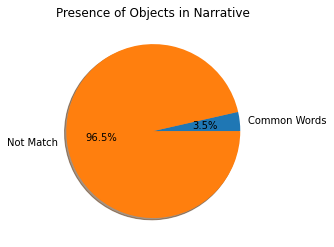

In [141]:
sizes = [count_true, 95000-count_true]
plt.pie(sizes, labels=['Common Words', 'Not Match'], autopct='%1.1f%%', shadow=True)
plt.title('Presence of Objects in Narrative')

In [144]:
count_true=0
for ele in imageMatch:
    for word in ele[0]:
        if word in ele[2]:
            count_true+=1
            continue

Text(0.5, 1.0, 'Presence of Objects in Captions')

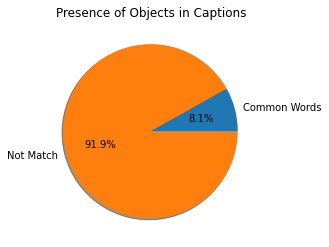

In [145]:
sizes = [count_true, 95000-count_true]
plt.pie(sizes, labels=['Common Words', 'Not Match'], autopct='%1.1f%%', shadow=True)
plt.title('Presence of Objects in Captions')

In [98]:
#continuous to categorical
finalResult['Age Range'] = pd.cut(x=finalResult['Age'], bins=[0, 3, 17, 63, 99],labels=['Baby/Toddler', 'Child', 'Adult', 'Elderly'])
age=[str(a) for a in finalResult['Age Range']]
gender=[str(g)for g in finalResult['Gender']]
top=list(zip(age, gender, objectWord,narrative, caption))

In [126]:
def get_top_words(word_list):
    word_counts = {}
    for word in word_list:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    sorted_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    top_words = dict(sorted_words[:20])
    return top_words

In [127]:
def draw_bar_gender(group):
    result=get_top_words_by_gender(top, group)
    words = list(result.keys())
    counts = list(result.values())
    fig, ax = plt.subplots()
    ax.bar(words, counts)
    ax.set_title('Top Words For '+group+' Pixstory users')
    ax.set_xlabel('Words')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

def draw_bar_age(group):
    result=get_top_words_by_age(top, group)
    words = list(result.keys())
    counts = list(result.values())
    fig, ax = plt.subplots()
    ax.bar(words, counts)
    ax.set_title('Top Words For '+group+' Pixstory users')
    ax.set_xlabel('Words')
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()
    plt.show()

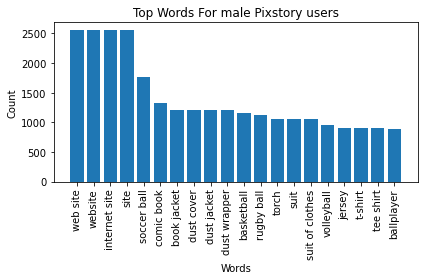

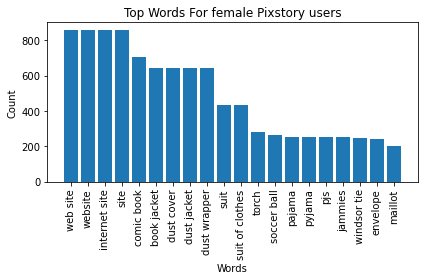

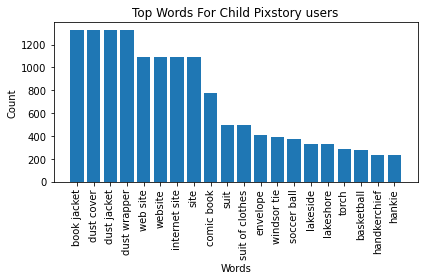

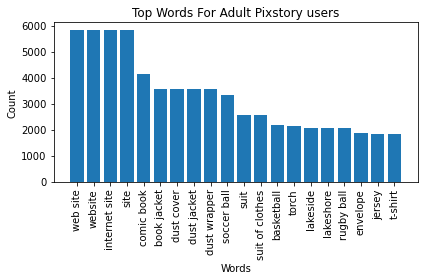

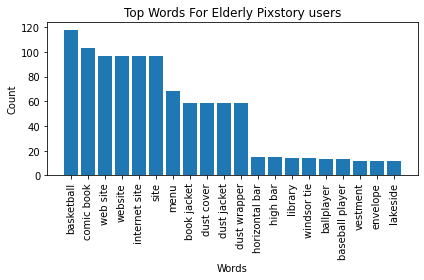

In [128]:
def get_top_words_by_gender(df, gender):
    filtered_df = [e for e in df if e[1]==gender] 
    all_words = []
    for e in filtered_df:
        words=e[2]
        for w in words:
            all_words.append(w)
    
    return get_top_words(all_words)


def get_top_words_by_age(df, age):
    filtered_df = [e for e in df if e[0]==age] 
    all_words = []
    for e in filtered_df:
        words=e[2]
        for w in words:
            all_words.append(w)
    
    return get_top_words(all_words)

draw_bar_gender('male')
draw_bar_gender('female')
draw_bar_age('Child')
draw_bar_age('Adult')
draw_bar_age('Elderly')